## Note :
- we mainly use Mean and Median to fill Numerical Variables
- we mainly use Mode to fill Catagorical variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Datasets/house_prices/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Getting rid of columns with high missing values (beyond 25 %)

In [9]:
percent_null = df.isnull().sum()/df.shape[0]*100

In [60]:
df2 = df.drop(percent_null[percent_null>25].keys(),axis = 1)
df2.shape

(1460, 76)

In [61]:
df.shape

(1460, 81)

# Numerical Value Data Impuation (mainly Mean and Median)

## Note : 
- before we decide to fill NAN values with either mean or median, we must look at the data distribution

- if the data distriution is symmetrical (normal distribution / gaussial distribution) then the Mean, Median & Mode all lie at the same spot , i.e., peak.
- so any central tendency value among mean, median or mode can be taken to fill up the missing data , but we normaly use Mean.

- if the data distribution is skewed to one side, usually Median is taken as it lies at the middle
- Mean here shifts towards to the peak (which is skewed), so it is not considered.

<AxesSubplot:>

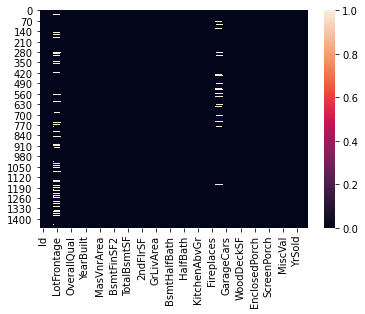

In [62]:
sns.heatmap(df2.select_dtypes(include = ['float64','int64']).isnull())

In [63]:
# collecting all columns containing numerical variable

numerical_cols = df2.select_dtypes(include = ['float64','int64']).isnull().sum()
numerical_cols = numerical_cols[numerical_cols>0].keys()

In [64]:
numerical_cols

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [65]:
len(numerical_cols)

3

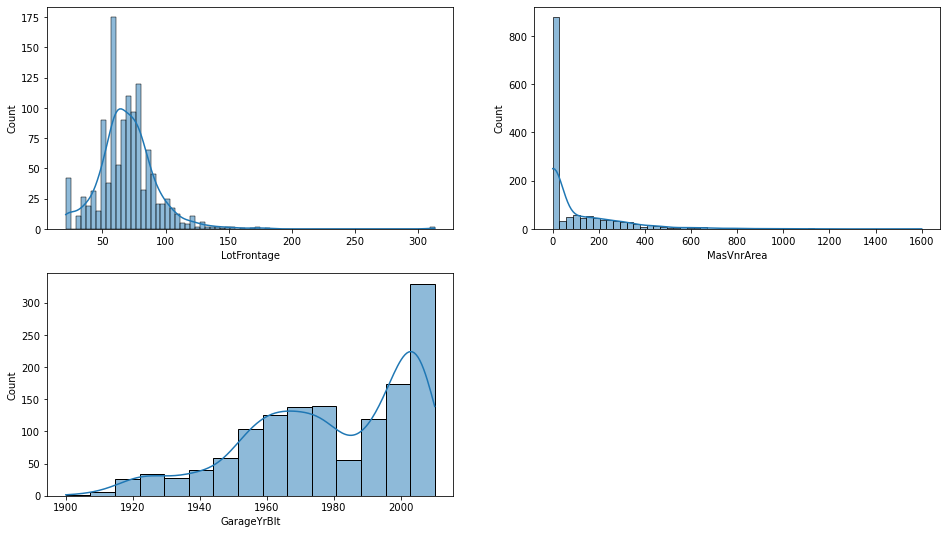

In [66]:
plt.figure(figsize=(16,9))

for i in range(len(numerical_cols)):
    plt.subplot(2,2,i+1)
    sns.histplot(df2[numerical_cols[i]],kde = True)

- here the peak of the kde for the 'LotFrontage' faeture is kindof symmetrical, so we can use mean to fill up the missing data.
- But the peak of 'MasVnrArea' & 'GarageYrBlt' are skewed, so we will use Median to fill up the missing values.

In [90]:
df3 = df2.fillna({
    'LotFrontage' : df2['LotFrontage'].mean(),
    'MasVnrArea' : df2['MasVnrArea'].median(),
    'GarageYrBlt' : df2['GarageYrBlt'].median()
})

<AxesSubplot:>

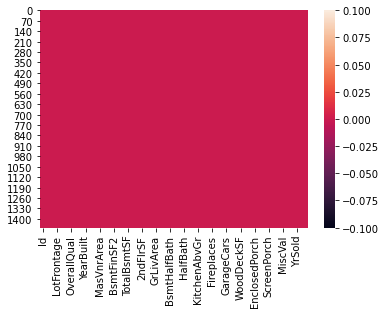

In [91]:
sns.heatmap(df3.select_dtypes(include=['int64','float64']).isnull())

### comparison of data distribution after imputation

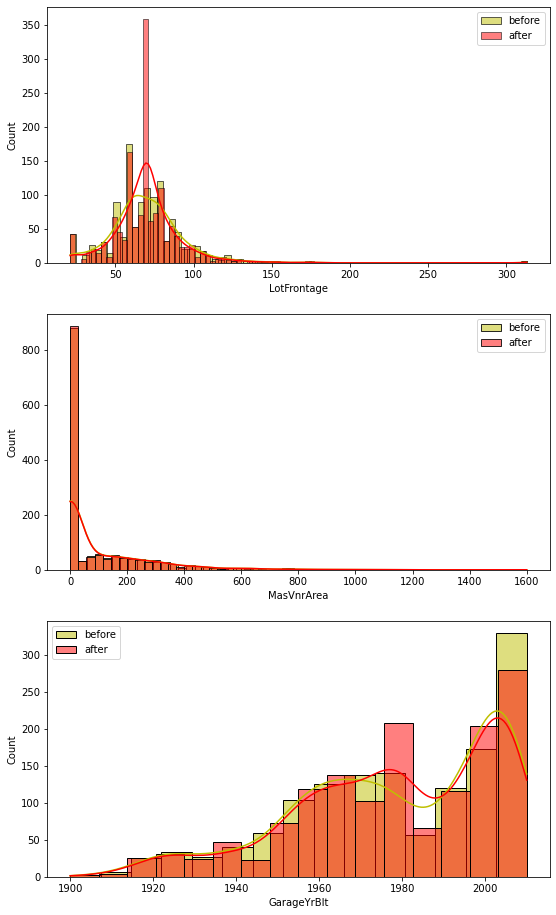

In [92]:
plt.figure(figsize=(9,16))

for i in range(len(numerical_cols)):
    plt.subplot(3,1,i+1)
    sns.histplot(df2[numerical_cols[i]],kde = True, color='y',label = 'before')
    sns.histplot(df3[numerical_cols[i]],kde = True, color= 'r',label = 'after')
    plt.legend()